# VLE calculation for fluid mixtures with SAFT-$\gamma$-Mie

In this notebook, VLE calculations for fluid mixtures with ```saftgammamie``` EoS are illustrated.

First, all the needed modules are imported.

- NumPy: numerical interface and work with arrays
- matplotlib: to plot results
- SGTPy: package with SAFT-$\gamma$-Mie EoS and phase equilibria functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SGTPy import component, mixture, saftgammamie

Now, pure components are configured and created with the ```component``` function. Then, a mixture is created with them using the ```mixture``` function or by adding (`+`) pure components. The interaction parameters are set up with the ```mixture.saftgammamie``` method. Finally, the ```eos``` object is created with the ```saftgammamie``` function.

The ```eos``` object includes all the necessary methods to compute phase equilibria and interfacial properties using SAFT-$\gamma$-Mie EoS.

For this notebook, all calculations are exemplified for a mixture of ethanol and water.

In [2]:
ethanol = component(GC={'CH3':1, 'CH2OH':1})
water = component(GC={'H2O':1})

# creating mixture with mixture class function
mix = mixture(ethanol, water)
# or creating mixture by adding pure components
mix = ethanol + water

mix.saftgammamie()
eos = saftgammamie(mix)

## Flash calculation

This type of equilibria calculation is carried out at given global composition (z), temperature (K), and pressure (Pa) and can be used for vapor/liquid and liquid/liquid equilibria. 

The flash calculation is carried out with the ```flash``` function and it requires initial guesses for the phase composition ```x0```, ```y0``` and their aggregation state (```LV``` for liquid/vapor equilibria).

The ```full_output``` option allows obtaining all the information related to the flash calculation. This includes the volume of the phases and the solution for the fraction of the nonbonded sites of each phase.

In [3]:
from SGTPy.equilibrium import flash

# flash conditions
T = 350.  # K
P = 7e4  # Pa
z = np.array([0.3, 0.7])
# initial guesses for liquid and vapor phase composition 
x0 = np.array([0.1, 0.9])
y0 = np.array([0.5, 0.5])
flash(x0, y0, 'LV', z, T, P, eos, full_output=True)

      T: 350.0
      P: 70000.0
   beta: 0.4818993735440099
  error: 5.410518694441286e-09
   iter: 9
      X: array([0.14206301, 0.85793699])
     v1: 2.402497322791955e-05
  Xass1: array([0.41915237, 0.13170452, 0.09188515, 0.18757305])
 state1: 'L'
      Y: array([0.46980153, 0.53019847])
     v2: 0.040332421634274404
  Xass2: array([0.99116277, 0.98274724, 0.97872689, 0.99009905])
 state2: 'V'

In the previous calculation, both volume and nonbonded association sites were automatically initialized. When a good initial guess for any of these is available, these can be supplied to the ```flash``` function.

This will result in a **faster** calculation.

- Initial guesses for volumes are passed to the function to the ```v0``` option. 
- Initial guesses for nonbonded sites fraction are passed to the function to the ```Xass0```option.

In [4]:
# flash conditions
T = 350.  # K
P = 7e4  # Pa
z = np.array([0.3, 0.7])
# initial guesses for liquid and vapor phase composition 
x0 = np.array([0.1, 0.9])
y0 = np.array([0.5, 0.5])
# initial guesses for volume of the phases in m3/mol
vl0 = 2.4023739277071e-05
vv0 = 0.04033242163966655
# initial guesses for the nonbonded association fraction
Xassl0 = np.array([0.41918497, 0.13169507, 0.091888  , 0.18755536])
Xassv0 = np.array([0.99116277, 0.98274724, 0.97872689, 0.99009905])

flash(x0, y0, 'LV', z, T, P, eos, v0=[vl0, vv0], Xass0=[Xassl0, Xassv0], full_output=True)

      T: 350.0
      P: 70000.0
   beta: 0.4818993735440271
  error: 5.4105188140446956e-09
   iter: 9
      X: array([0.14206301, 0.85793699])
     v1: 2.402497322791948e-05
  Xass1: array([0.41915237, 0.13170452, 0.09188515, 0.18757305])
 state1: 'L'
      Y: array([0.46980153, 0.53019847])
     v2: 0.04033242163427444
  Xass2: array([0.99116277, 0.98274724, 0.97872689, 0.99009905])
 state2: 'V'

## Bubble point calculation

This type of equilibria calculation is carried out at given composition (x) of a liquid phase and fixed temperature (K) or pressure (Pa).

The function ```bubblePy``` is used to compute equilibrium pressure and vapor phase composition and it requires initial guesses of these variables. On the other hand, the function ```bubbleTy``` is used to compute equilibrium temperature and vapor phase composition, this function requires initial guesses of those variables.

For both functions, the ```full_output``` option allows obtaining all the information related to the bubble point calculation. This includes the volume of the phases and the solution for the fraction of the nonbonded sites of each phase.

Similarly as for flash calculation, initial guesses for the volume roots and nonbonded association sites can be supplied to the function using the ```v0``` and ```Xass0``` options.

In [5]:
# bubble point x, T -> y, P
from SGTPy.equilibrium import bubblePy

# bubble point conditions
T = 350.  # K
x = np.array([0.4, 0.6])

# initial guesses for pressure and vapor phase composition 
P0 = 8e4  # Pa
y0 = np.array([0.7, 0.3])

bubblePy(y0, P0, x, T, eos, full_output=True)

      T: 350.0
      P: 84684.08786842847
  error: 4.5146797411632633e-10
   iter: 4
      X: array([0.4, 0.6])
     v1: 3.449056996172182e-05
  Xassl: array([0.25196453, 0.21802053, 0.07876354, 0.35073803])
 state1: 'Liquid'
      Y: array([0.62168852, 0.37831148])
     v2: 0.03319895229992337
  Xassv: array([0.9864273 , 0.98215819, 0.9730384 , 0.9912061 ])
 state2: 'Vapor'

In [6]:
# bubble point x, P -> y, T
from SGTPy.equilibrium import bubbleTy

P = 8e4  # Pa
x = np.array([0.4, 0.6])

# initial guesses for temperature and vapor phase composition 
T0 = 350.  # K
y0 = np.array([0.7, 0.3])

bubbleTy(y0, T0, x, P, eos, full_output=True)

      T: 348.591143468008
      P: 80000.0
  error: 6.80728919996078e-09
   iter: 3
      X: array([0.4, 0.6])
     v1: 3.4439051512680454e-05
  Xassl: array([0.24880592, 0.21636302, 0.07730816, 0.34933479])
 state1: 'Liquid'
      Y: array([0.62234296, 0.37765704])
     v2: 0.035038840156687026
  Xassv: array([0.98678429, 0.98265567, 0.97378494, 0.99147763])
 state2: 'Vapor'

## Dew point calculation

This type of equilibria calculation is carried out at given composition (y) of a vapor phase and fixed temperature (K) or pressure (Pa).

The function ```dewPx``` is used to compute equilibrium pressure and liquid phase composition and it requires initial guesses of these variables. On the other hand, the function ```dewTx``` is used to compute equilibrium temperature and liquid phase composition, this function requires initial guesses of those variables.

For both functions, the ```full_output``` option allows obtaining all the information related to the dew point calculation. This includes the volume of the phases and the solution for the fraction of the nonbonded sites of each phase.

Similarly, as for flash calculation, initial guesses for the volume roots and nonbonded association sites can be supplied to the function using the ```v0``` and ```Xass0``` options.

In [7]:
# dew point y, T -> x, P
from SGTPy.equilibrium import dewPx

T = 350.  # K
y = np.array([0.7, 0.3])

# initial guesses for pressure and liquid phase composition 
P0 = 8e4  # Pa
x0 = np.array([0.4, 0.6])

dewPx(x0, P0, y, T, eos, full_output=True)

      T: 350.0
      P: 89838.46078957742
  error: 8.124434458522956e-09
   iter: 3
      X: array([0.58874253, 0.41125747])
     v1: 4.256377175907981e-05
  Xassl: array([0.18903435, 0.29803731, 0.07461793, 0.49904865])
 state1: 'Liquid'
      Y: array([0.7, 0.3])
     v2: 0.0312619974990575
  Xassv: array([0.98403124, 0.98272147, 0.97072448, 0.99241082])
 state2: 'Vapor'

In [8]:
# dew point y, P -> x, T
from SGTPy.equilibrium import dewTx

P = 8e4  # Pa
y = np.array([0.7, 0.3])

# initial guesses for temperature and liquid phase composition 
T0 = 350.  # K
x0 = np.array([0.4, 0.6])

dewTx(x0, T0, y, P, eos, full_output=True)

      T: 347.1532609685856
      P: 80000.0
  error: 6.283862319378583e-14
   iter: 4
      X: array([0.58672282, 0.41327718])
     v1: 4.2336901665060726e-05
  Xassl: array([0.18347498, 0.29351373, 0.07167943, 0.49506281])
 state1: 'Liquid'
      Y: array([0.7, 0.3])
     v2: 0.03489866499595257
  Xassv: array([0.98490102, 0.98366633, 0.97236853, 0.99286495])
 state2: 'Vapor'

## Whole phase diagram calculation

In the following codeblock, the whole phase diagram is computed at a constant temperature.
It is advised to store the computed volume roots and nonbonded sites fraction, as these can be used in the following iterations to speed up calculations.

In [9]:
T = 350 # K
n = 50  # number of points in the diagram
x1 = np.linspace(0, 1, n)
X = np.array([x1, 1-x1])

# creating arrays to store the results
P = np.zeros(n)
Y = np.zeros_like(X)
vx = np.zeros(n)
vy = np.zeros(n)

# computing first point - pure fluid 2
i = 0 
P0 = 4e4
sol = bubblePy(X[:, i], P0, X[:, i], T, eos, full_output=True)
Y[:,i], P[i] = sol.Y, sol.P
vx[i], vy[i] = sol.v1, sol.v2
Xassl, Xassv = sol.Xassl, sol.Xassv
sol

      T: 350
      P: 41041.373221910704
  error: 5.341949105286403e-12
   iter: 4
      X: array([0., 1.])
     v1: 1.8623432572733155e-05
  Xassl: array([0.63765482, 0.09073653, 0.11294831, 0.11294831])
 state1: 'Liquid'
      Y: array([0., 1.])
     v2: 0.06936831715789872
  Xassv: array([0.99915561, 0.98531567, 0.9894095 , 0.9894095 ])
 state2: 'Vapor'

In [10]:
# computing the rest of the diagram using the already computed values as initial guesses
for i in range(1, n):
    sol = bubblePy(Y[:,i-1], P[i-1], X[:, i], T, eos, v0=[vx[i-1], vy[i-1]], Xass0=[Xassl, Xassv],
                   full_output=True)
    Y[:,i], P[i] = sol.Y, sol.P
    vx[i], vy[i] = sol.v1, sol.v2
    Xassl, Xassv = sol.Xassl, sol.Xassv

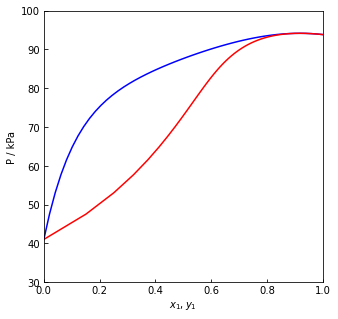

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(X[0], P/1e3, color='b')
ax.plot(Y[0], P/1e3, color='r')
ax.set_xlabel('$x_1, y_1$')
ax.set_ylabel('P / kPa')
ax.set_xlim([0, 1])
ax.set_ylim([30, 100])
ax.tick_params(direction='in')
# fig.savefig('vle-binary.pdf')

For further information of any of these functions just run: ```function?```